# Name      :   Yohan Abeysinghe
# Index No  :   190014F

All the imports are done at the beginning. 

In [1]:
import sympy
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image 

Q1

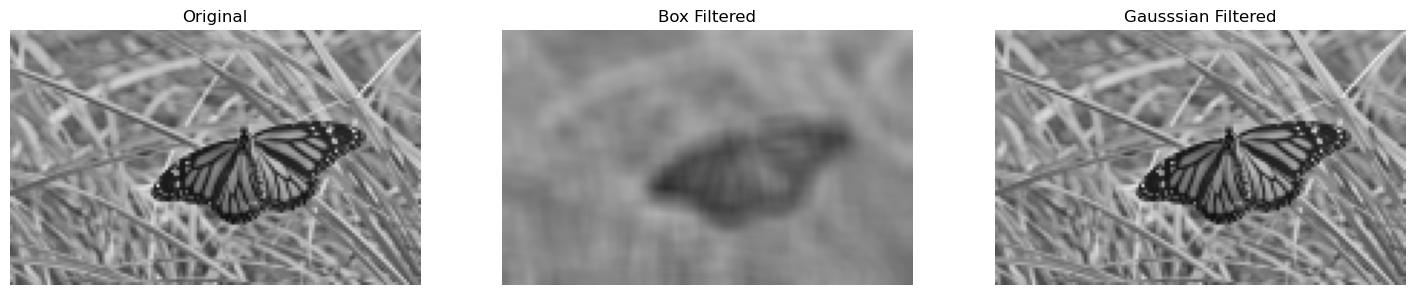

In [2]:
im = cv.imread(r'butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_8).astype(np.float32)
assert im is not None

k_size = 9
sigma = 4

box_kernel = 1./81*np.ones((k_size,k_size))
im_avg = cv.filter2D(im, -1, box_kernel)
im_gaussian = cv.GaussianBlur(im, (k_size, k_size), sigma)

fig, ax = plt.subplots(1, 3, figsize=(18,16))

ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[0].set_title(r'Original')

ax[1].imshow(im_avg, cmap='gray', vmin=0, vmax=255)
ax[1].set_title(r'Box Filtered')

ax[2].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[2].set_title(r'Gausssian Filtered')

for i in range(3):
    ax[i].axis('off')

plt.show()

Q2

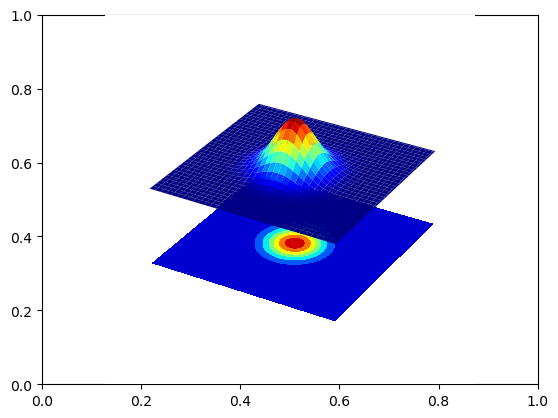

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')

step = 0.1
X = np.arange(-5, 5 + step, step)
Y = np.arange(-5, 5 + step, step)
XX, YY = np.meshgrid(X, Y)
sigma = 1.
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))


surf = ax.plot_surface(XX, YY, g, cmap=cm.jet)
cset = ax.contourf(XX, YY, g, zdir='z', offset=np.min(g) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(g) -2, np.max(g))

plt.axis('off')

plt.show()

Q3

(A), (B)

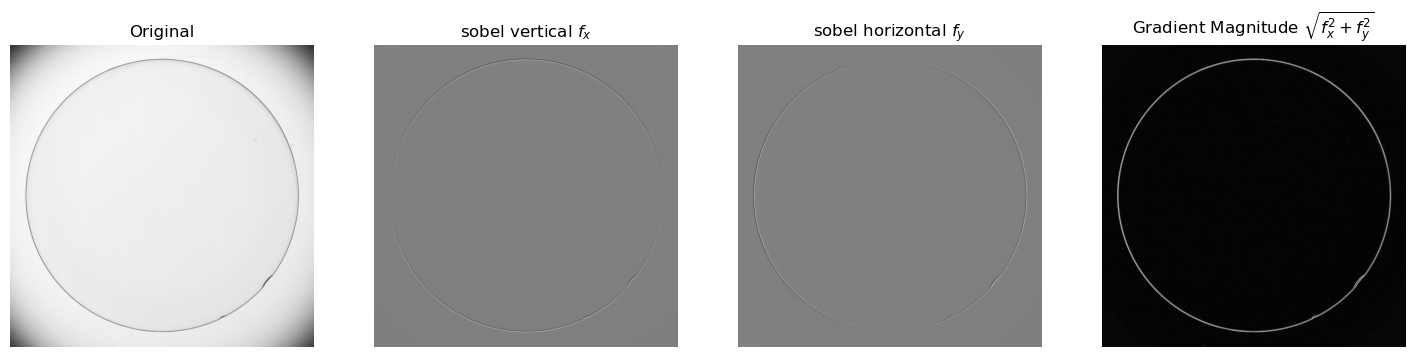

In [4]:
f = cv.imread(r'contact_lens.tif', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

# sobelx = cv.Sobel(im,cv.CV_64F,1,0,ksize=5)
# sobely = cv.Sobel(im,cv.CV_64F,0,1,ksize=5)

sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
f_x = cv.filter2D(f, -1, sobel_v)

sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
f_y = cv.filter2D(f, -1, sobel_h)

grad_mag = np.sqrt(f_x**2 + f_y**2)

fig, ax = plt.subplots(1, 4, figsize=(18,16))

ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')

ax[1].imshow(f_x, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title(r'sobel vertical $f_x$')

ax[2].imshow(f_y, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title(r'sobel horizontal $f_y$')

ax[3].imshow(grad_mag, cmap='gray')
ax[3].set_title(r'Gradient Magnitude $\sqrt{f_x^2+f_y^2}$')

for i in range(4):
    ax[i].axis('off')

plt.show()

(4)

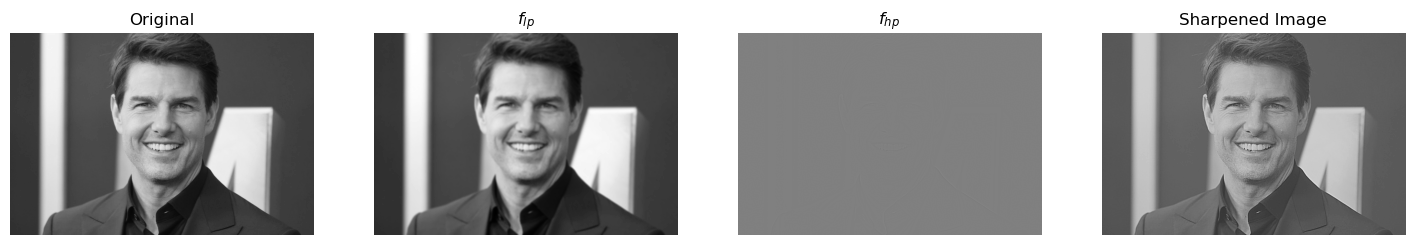

In [5]:
f = cv.imread(r'tom.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

sigma = 2
gaussian_1d = cv.getGaussianKernel(5, sigma)
f_lp = cv.sepFilter2D(f, -1, gaussian_1d, gaussian_1d)
f_hp = f - f_lp
f_sharpen = cv.addWeighted(f, 1.0, f_hp, 1.5, 0)

fig, ax = plt.subplots(1, 4, figsize=(18,16))

ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')

ax[1].imshow(f_lp, cmap='gray')
ax[1].set_title(r'$f_{lp}$')

ax[2].imshow(f_hp, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title(r'$f_{hp}$')

ax[3].imshow(f_sharpen, cmap='gray')
ax[3].set_title(r'Sharpened Image')

for i in range(4):
    ax[i].axis('off')

plt.show()

